In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,normalize
from sklearn.decomposition import PCA, NMF
import data_processing as dp
from scipy import signal
from scipy.stats import skew,pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py
from itertools import combinations
from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif,VarianceThreshold,RFE,SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import pearsonr

In [ ]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [ ]:
emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv')
emg_data2 = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_2_emg.csv')

In [ ]:
emg_data = emg_data.fillna({'LEFT_BF':emg_data.LEFT_BF.mean(),
                           'LEFT_RF':emg_data.LEFT_RF.mean(),
                           'RIGHT_TA':emg_data.RIGHT_TA.mean(),
                           'RIGHT_TS':emg_data.RIGHT_TS.mean(),
                           'RIGHT_BF':emg_data.RIGHT_BF.mean(),
                           'RIGHT_RF':emg_data.RIGHT_RF.mean()})
emg_data.isna().sum()

In [ ]:
Data = pd.read_csv('./processed data/featurePcwtf_W256_S64_WS32_DWTLmax_dropna_samelabel.csv')

# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
drop = 'P551_M050_2_B_FoG_trial_2_emg.csv'
ind_drop = df.columns!=drop

# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)


In [ ]:
files = np.concatenate([np.array(df.columns),np.array(df3.loc[:,0])])
ind = Data.File.isin(files)
Data_sel = Data[ind]
Data_rest = Data[~ind]

In [ ]:
feature_col = ['_IEMG','_MAV','_SSI','_VAR','_RMS',
               '_WL','_ZC','_SSC','_WAMP','_skew',
               '_Acti','_AR','_HIST','_MDF','_MNF','_mDWT']

feature_all = Data_sel.iloc[:,1:-1]
#ind_temp1 = feature_all.columns.str.contains('_IEMG')
#ind_temp2 = feature_all.columns.str.contains('_skew')
#ind_temp3 = feature_all.columns.str.contains('_mDWT')
#ind_temp = ind_temp2|ind_temp3
ind_temp = feature_all.columns.str.contains('_mDWT')
feature = feature_all.loc[:,~ind_temp]
#feature = Data_sel.iloc[:,1:-1]
y = Data_sel.iloc[:,0]
feature2_all = Data_rest.iloc[:,1:-1]
feature2 = feature2_all.loc[:,~ind_temp]
#feature2 = Data_rest.iloc[:,1:-1]
y2 = Data_rest.iloc[:,0]

In [ ]:
x,y = generate_window_slide_data(emg_data)
x2,y2 = generate_window_slide_data(emg_data2)

In [ ]:
path = './processed data/data_set_after_window_withoutSC.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [ ]:
feature = dp.generate_feature(x,2,0,bins=9,ranges=(-70,70))
#feature2 = dp.generate_feature(x2)

In [ ]:
sc = StandardScaler(with_mean=False)
feature_sc = sc.fit_transform(feature)

In [2]:
import ctypes
player = ctypes.windll.kernel32
player.Beep(1000,200)

1

In [ ]:
# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
#drop = 'G08_FoG_1_trial_1_emg.csv'
#ind_drop = df.columns!=drop

# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)

In [ ]:
# read the data and labels of df2 or df3
sc = StandardScaler(with_mean = True)
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
#files = np.array(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])#[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 512
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
X3 = []
Y3 = []
F = []
F2 = []
F3 = []
for file in files:
    i += 1
    if file.find('G04')==0:
        continue
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #for j in (0,1,4,5):
        #ind = abs(zscore(emg_data.iloc[:,j+3]))>10
        #emg_data=emg_data.loc[~ind,:]
        #ind_p = zscore(emg_data.iloc[:,j+3])>10
        #ind_n = zscore(emg_data.iloc[:,j+3])<-10
        #emg_data.loc[ind_p,emg_data.columns[3+j]] = emg_data.loc[~ind_p,emg_data.columns[3+j]].max()
        #emg_data.loc[ind_n,emg_data.columns[3+j]] = emg_data.loc[~ind_n,emg_data.columns[3+j]].min()
    fn = 300
    wn=2*fn/1000
    fn1 = 400
    wn1 = 2*fn1/1000
    #fs = 1000.0  # Sample frequency (Hz)
    #f0 = 50  # Frequency to be removed from signal (Hz)
    #Q = 100.0  # Quality factor
    # Design notch filter
    #b1, a1 = signal.iirnotch(f0, Q, fs)
    #b, a = signal.butter(4, [wn,wn1], 'bandpass')
    b, a = signal.butter(4, [wn], 'lowpass')
    #b, a = signal.butter(4, [wn], 'highpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    """if file==df.columns[5]:
        print(file)
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 72  # Frequency to be removed from signal (Hz)
        Q = 50.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TA'])
        f0 = 75  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'RIGHT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TS'])
    if file==df.columns[6]:
        print(file)
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 40  # Frequency to be removed from signal (Hz)
        Q = 100.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TA'])
        f0 = 26.5  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 48  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        #emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 50  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'RIGHT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TA'])
    if file==df.columns[7]:
        print(file)
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        Q = 50.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        emg_data.loc[:,'RIGHT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TS'])
        f0 = 26.5  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 50  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
    """
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    x_raw,y = dp.generate_window_slide_data_time_continue_fremove(emg_data,width=width,
                                        stride=stride,
                                        scaler=True,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    #x=dp.mean_smooth(x)
    shape = x_raw.shape
    x = np.zeros(shape)
    #x = x_raw
    for n in range(shape[0]):
        x[n,:,:] = dp.detrend(x_raw[n,:,:],50)
        for c in range(shape[2]):
            x[n,:,c] = signal.filtfilt(b,a,x[n,:,c])
    
    ind1 = []
    ind2 = []
    ind3 = []
    l = len(y)
    for j in set(y):
        ind = np.where(y == j)[0].tolist()
        l_t = len(ind)
#         if (j==1)&((file==df.columns[5])|(file==df.columns[17])):
#             continue
        if file == files[6]:
            ind3 += ind
            print('X2')
        else:
            ind1 += ind[:int(l_t*0.8)]
            ind2 += ind[int(l_t*0.8):int(l_t*1)]
        #ind3 += ind[int(l_t*0.8):]

    l1 = len(ind1)
    l2 = len(ind2)
    l3 = len(ind3)

    fi = [file]*len(ind1)
    fi2 = [file]*len(ind2)
    fi3 = [file]*len(ind3)
    
    X += x[ind1].tolist()
    Y += y[ind1].tolist()
    
    X2 += x[ind2].tolist()
    Y2 += y[ind2].tolist()
    
    X3 += x[ind3].tolist()
    Y3 += y[ind3].tolist()
    
    F += fi
    F2 += fi2
    F3 += fi3
    print('%d/%d: '%(i,N)+file)

ind_c = [True,True,False,False,True,True,False,False]
X = np.array(X)#[:,:,ind_c]
Y = np.array(Y)
X2 = np.array(X2)#[:,:,ind_c]
Y2 = np.array(Y2)
X3 = np.array(X3)#[:,:,ind_c]
Y3 = np.array(Y3)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))
player.Beep(1000,200)

In [261]:
file = './processed data/data_set_after_window_W1024_S512_D50_F300_SD_leave_file6_out.hdf5'
with h5py.File(file,'r') as f:
    X = f['X'][...]
    Y = f['Y'][...]
    X2 = f['X2'][...]
    Y2 = f['Y2'][...]
    X3 = f['X3'][...]
    Y3 = f['Y3'][...]

In [ ]:
import imp
imp.reload(dp)

In [262]:
def generate_feature_pd(data,threshold_WAMP=30,
                     threshold_ZC=0,
                     threshold_SSC=0,
                     bins=9,
                     ranges=(-10,10),
                     fbins=5,
                     franges=(0,300),
                     threshold_F=0.5,
                     num = 3,
                     wavelet='db7',
                     level=3):
    columns = pd.Index(['LEFT_TA', 'LEFT_TS', 'LEFT_BF', 'LEFT_RF',
       'RIGHT_TA', 'RIGHT_TS', 'RIGHT_BF', 'RIGHT_RF'])
    IEMG = pd.DataFrame(dp.compute_IEMG(data),columns=columns+'_IEMG')
    #MAV = pd.DataFrame(compute_MAV(data),columns=columns+'_MAV')
    SSI = pd.DataFrame(dp.compute_SSI(data),columns=columns+'_SSI')
    #VAR = pd.DataFrame(compute_VAR(data),columns=columns+'_VAR')
    #RMS = pd.DataFrame(compute_RMS(data),columns=columns+'_RMS')
    WL = pd.DataFrame(dp.compute_WL(data),columns=columns+'_WL')
    ZC = pd.DataFrame(dp.compute_ZC(data,threshold_ZC),columns=columns+'_ZC')
    #ZC = compute_ZC_expand_pd(data,threshold_ZC)
    ku = pd.DataFrame(dp.compute_ku(data),columns=columns+'_ku')
    SSC = pd.DataFrame(dp.compute_SSC(data,threshold_SSC),columns=columns+'_SSC')
#     WAMP = pd.DataFrame(dp.compute_WAMP(data,threshold_WAMP),columns=columns+'_WAMP')
    skew = pd.DataFrame(dp.compute_Skewness(data),columns=columns+'_skew')
    Acti = pd.DataFrame(dp.compute_Acti(data),columns=columns+'_Acti')
#     Mobi = pd.DataFrame(dp.compute_Mobi(data),columns=columns+'_Mobi')
#     Comp = pd.DataFrame(dp.compute_complexity(data),columns=columns+'_Comp')
    AR = pd.DataFrame(dp.compute_AR(data),columns=columns+'_AR')
    #AR = compute_AR_pd(data)
#     CC = dp.compute_CC_pd(data)
    HIST = dp.compute_HIST_pd(data,bins=bins,ranges=ranges)
    #FHIST = compute_FHIST_pd(data,bins=fbins,ranges=franges,threshold=threshold_F)
#     MF = dp.compute_MaxFreq_pd(data,num=num)
    MDF = pd.DataFrame(dp.compute_MDF(data),columns=columns+'_MDF')
    MNF = pd.DataFrame(dp.compute_MNF(data),columns=columns+'_MNF')
    mDWT = dp.compute_mDWT_pd(data,wavelet,level)
    feature = pd.concat([IEMG,SSI,WL,ZC,ku,SSC,skew,Acti,AR,HIST,MDF,MNF,mDWT],axis =1)
    return feature

In [263]:
#width = 256
threshold_WAMP = 1
threshold_ZC = 0.00
#threshold_ZC = np.linspace(-4,4,11)
threshold_SSC = 0.01
bins=3
bound = 3
HIST_range = (-bound,bound)
level = 3
num = 3
wavelet='db7'

In [264]:
feature = generate_feature_pd(X,threshold_WAMP=threshold_WAMP,
                              threshold_ZC=threshold_ZC,
                              threshold_SSC=threshold_SSC,
                              bins=bins,ranges=HIST_range,
                                level = level)
feature2 = generate_feature_pd(X2,threshold_WAMP=threshold_WAMP,
                              threshold_ZC=threshold_ZC,
                              threshold_SSC=threshold_SSC,
                              bins=bins,ranges=HIST_range,
                                 level = level)
feature3 = generate_feature_pd(X3,threshold_WAMP=threshold_WAMP,
                              threshold_ZC=threshold_ZC,
                              threshold_SSC=threshold_SSC,
                              bins=bins,ranges=HIST_range,
                                 level = level)
player.Beep(1000,200)

1

In [ ]:
ind1 = ((Y==0)|(Y==2)|(Y==6))
ind2 = ((Y2==0)|(Y2==2)|(Y2==6))
ind3 = ((Y3==0)|(Y3==2)|(Y3==6))

In [ ]:
scaler = MinMaxScaler((0,1))
#scaler = StandardScaler(with_mean=True)
feature = scaler.fit_transform(feature)
feature2 = scaler.fit_transform(feature2)
feature3 = scaler.fit_transform(feature3)

In [ ]:
#skb = SelectKBest(chi2, k=200)
skb = SelectKBest(mutual_info_classif, k=200)
feature_new=skb.fit_transform(feature, Y)
feature_new2=skb.transform(feature2)
feature_new3=skb.transform(feature3)

In [ ]:
vt = VarianceThreshold(threshold=0.01)
feature_new=vt.fit_transform(feature)
feature_new2=vt.transform(feature2)
feature_new3=vt.transform(feature3)

In [ ]:
pca = PCA(n_components=150,copy=True)
feature_new = pca.fit_transform(feature)
feature_new2 = pca.transform(feature2)
feature_new3 = pca.transform(feature3)

In [ ]:
sfm = SelectFromModel(GradientBoostingClassifier(),max_features=200)
feature_new = sfm.fit_transform(feature,Y)
feature_new2 = sfm.transform(feature2)
feature_new3 = sfm.transform(feature3)

In [ ]:
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=200)
feature_new = rfe.fit_transform(feature,Y)
feature_new2 = rfe.transform(feature2)
feature_new3 = rfe.transform(feature3)

In [ ]:
feature.shape

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from imblearn.over_sampling import SMOTE,BorderlineSMOTE

In [ ]:
def train_model(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y.copy()
        y_01[ind1] = 1
        metric = 'error'
    else:
        ind = ((y==1)|(y==2)|(y==6))
        y_01 = y[ind].copy()
        metric = 'merror'
    x_full,x_test,y_full,y_test = train_test_split(feature.loc[ind,:],y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=False)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.2,
                                                       random_state=555,
                                                       shuffle=True)
    
    model.fit(x_train, y_train)
    y_pred_t=model.predict(x_test)
    test = metrics.accuracy_score(y_test,y_pred_t)
    y_pred_v=model.predict(x_valid)
    valid = metrics.accuracy_score(y_valid,y_pred_v)
    y_pred_ta=model.predict(x_train)
    train = metrics.accuracy_score(y_train,y_pred_ta)
    if binary == False:
        print('train: \n',metrics.confusion_matrix(y_train,y_pred_ta))
        print('valid: \n',metrics.confusion_matrix(y_valid,y_pred_v))
        print('test: \n',metrics.confusion_matrix(y_test,y_pred_t))
    print('test:%f'%test)
    print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    return train,valid,test

def test_model(model,feature,y):
    ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
    y_01 = y.copy()
    y_01[ind] = 1
    y_pred=model.predict(feature)
    test = metrics.accuracy_score(y_01,y_pred>0.5)
    print('acc:%f'%test)
    return test

def test_load_model(path,feature,y):
    ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
    y_01 = y.copy()
    y_01[ind] = 1
    booster = xgb.Booster()
    booster.load_model(path)
    model = xgb.XGBClassifier()
    model._Booster = booster
    y_pred=model.predict(feature)
    test = metrics.accuracy_score(y_01,y_pred)
    print('acc:%f'%test)
    return test

In [273]:
def train_model_no_shuffle(model,feature,y,trans,binary=True,file=None):
    if binary:
        ind1 = ((y[0]==0)|(y[0]==1)|(y[0]==2)|(y[0]==3)|(y[0]==4)|(y[0]==6))
        ind2 = ((y[1]==0)|(y[1]==1)|(y[1]==2)|(y[1]==3)|(y[1]==4)|(y[1]==6))
        ind3 = ((y[2]==0)|(y[2]==1)|(y[2]==2)|(y[2]==3)|(y[2]==4)|(y[2]==6))
        ind01 = ((y[0]==4)|(y[0]==1)|(y[0]==2)|(y[0]==3)|(y[0]==6))
        ind11 = ((y[1]==4)|(y[1]==1)|(y[1]==2)|(y[1]==3)|(y[1]==6))
        ind21 = ((y[2]==4)|(y[2]==1)|(y[2]==2)|(y[2]==3)|(y[2]==6))
        
        y_01 = y[0][ind1].copy()
        y_02 = y[1][ind2].copy()
        y_03 = y[2][ind3].copy()

        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind01] = 1
        y_02[ind11] = 1
        y_03[ind21] = 1
        
    else:
        ind1 = ((y[0]==1)|(y[0]==2)|(y[0]==6))
        ind2 = ((y[1]==1)|(y[1]==2)|(y[1]==6))
        ind3 = ((y[2]==1)|(y[2]==2)|(y[2]==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[0][ind1].copy()
        y_02 = y[1][ind2].copy()
        y_03 = y[2][ind3].copy()


    x_train = feature[0][ind1]
    y_train = y_01
    x_valid = feature[1][ind2]
    y_valid = y_02
    x_train,x_valid,y_train,y_valid = train_test_split(np.concatenate([x_train,x_valid]),np.concatenate([y_train,y_valid]),
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    x_test = feature[2][ind3]
    y_test = y_03
#     scaler = StandardScaler(with_mean=True)
    scaler = MinMaxScaler()
    #sm = BorderlineSMOTE(random_state=50)
    #x_train,y_train = sm.fit_resample(x_train,y_train)
    x_train = scaler.fit_transform(x_train)
    x_valid = scaler.fit_transform(x_valid)
    x_test = scaler.fit_transform(x_test)
#     pca = PCA(n_components=150,copy=True)
    x_train = trans.fit_transform(x_train)
    x_valid = trans.transform(x_valid)
    x_test = trans.transform(x_test)
    
#     s_ind1 = y_train == 0
#     s_ind2 = y_train == 2
#     s_ind3 = y_train == 6
#     samples_weights = np.zeros(y_train.shape)
#     samples_weights[s_ind1]=1
#     samples_weights[s_ind2]=100
#     samples_weights[s_ind3]=100

    model.fit(x_train, y_train)
    
    if binary:
        y_pred_t=model.predict(x_test)
        test = metrics.accuracy_score(y_test,y_pred_t)
        y_pred_v=model.predict(x_valid)
        valid = metrics.accuracy_score(y_valid,y_pred_v)
        y_pred_ta=model.predict(x_train)
        train = metrics.accuracy_score(y_train,y_pred_ta)        
        print('train: \n',metrics.confusion_matrix(y_train,y_pred_ta))
        print('valid: \n',metrics.confusion_matrix(y_valid,y_pred_v))
        print('test: \n',metrics.confusion_matrix(y_test,y_pred_t))
        print('test:%f'%test)
        print('valid:%f'%valid)
        print('train:%f'%train)

    else:
        y_pred_t=model.predict(x_test)
        test = metrics.accuracy_score(y_test,y_pred_t)
        y_pred_v=model.predict(x_valid)
        valid = metrics.accuracy_score(y_valid,y_pred_v)
        y_pred_ta=model.predict(x_train)
        train = metrics.accuracy_score(y_train,y_pred_ta)        
        print('train: \n',metrics.confusion_matrix(y_train,y_pred_ta))
        print('valid: \n',metrics.confusion_matrix(y_valid,y_pred_v))
        print('test: \n',metrics.confusion_matrix(y_test,y_pred_t))
        print('test:%f'%test)
        print('valid:%f'%valid)
        print('train:%f'%train)
#     if file != None:
#         model.save_model(file)
    #return train,test     
    

In [ ]:
ind = ((y==0)|(y==2))
y_02 = y[ind]
y_02[y_02==2] = 1
oh_ec = OneHotEncoder()
y_oh = oh_ec.fit_transform(y[:,np.newaxis]).toarray()
x_train,x_valid,y_train,y_valid = train_test_split(feature[ind],y_02,test_size=0.2)

In [ ]:
ind = ((y==1)|(y==2)|(y==3)|(y==6))
#ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
ind_f = [0,1,6,42,46,57,62]
y_01 = y[ind]
y_01[y_01==1]=0
y_01[y_01==2]=1
y_01[y_01==3]=2
y_01[y_01==6]=3
#y_01 = y
#y_01[ind] = 1
oh_ec = OneHotEncoder()
y_oh = oh_ec.fit_transform(y_01[:,np.newaxis]).toarray()
x_full,x_test,y_full,y_test = train_test_split(feature_sc[ind][:-2000],y_01[:-2000],test_size=0.2,random_state=123)
x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,test_size=0.2,random_state=555)

In [267]:
model = SVC(kernel="rbf",C=10,
            #class_weight={0:1,2:10,6:10},
#             class_weight={0:1,1:5},
            gamma='auto',
           #decision_function_shape='ovo'
           )
#model.fit(x_train,y_train)

In [274]:
pca = PCA(n_components=70,copy=True)
sfm = SelectFromModel(GradientBoostingClassifier(),max_features=80)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=80)
vt = VarianceThreshold(threshold=0.01)
train_model_no_shuffle(model,(np.array(feature),np.array(feature2),np.array(feature3)),
                       (np.array(Y),np.array(Y2),np.array(Y3)),
                       vt,
                       False)

train: 
 [[104  16]
 [ 19 259]]
valid: 
 [[24  9]
 [ 3 74]]
test: 
 [[18 34]
 [ 0 57]]
test:0.688073
valid:0.890909
train:0.912060


In [ ]:
sc = StandardScaler(with_mean=True)
feature_sc = sc.fit_transform(feature)
feature2_sc = sc.transform(feature2)
acc={}
train,valid,test = train_model(model,feature,np.array(y),True)
acc_rest=test_model(model,feature2,y2)
acc['SVM'] = [train,valid,test,acc_rest]
print(acc_rest)

In [ ]:
metrics.confusion_matrix(y_01[28844:],y_pred)

In [ ]:
feature_sc.max(axis=1)

In [ ]:
pd.Series(y_train).value_counts()

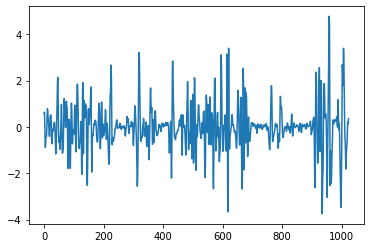

In [125]:
plt.plot(X[10,:,0])